<a href="https://colab.research.google.com/github/1306minyoung/data/blob/main/4_1_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 준비
csv 파일 다운받아 판다스 데이터 프레임 형태로 저장하고 이중 5줄 출력

In [2]:
import pandas as pd

fish = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
fish.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##클래스 추출
데이터에 어떤 클래스가 있는지 확인

In [3]:
print(pd.unique(fish['Species']))

['setosa' 'versicolor' 'virginica']


##입력데이터와 정답 데이터를 생성
입력데이터는 iris_input, 정답데이터는 iris_target으로 설정(5번째까지의 데이터 각각 출력)

In [4]:
iris_input = fish[['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width']].to_numpy()

In [5]:
print(iris_input[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
iris_target = fish['Species'].to_numpy()

##훈련세트와 테스트세트로 나누기
train_input, test_input, train_target, test_target

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    iris_input, iris_target, stratify=iris_target, random_state=42)

##데이터 표준화

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

##k-최근접 이웃 알고리즘을 이용해 훈련하고 훈련 세트와 테스트 세트에 대해 평가

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


In [10]:
print(kn.classes_)

['setosa' 'versicolor' 'virginica']


In [11]:
print(kn.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


##테스트세트의 5개의 데이터에 대해 예측과 확률을 알아보자

In [12]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))


[[1.     0.     0.    ]
 [0.     0.6667 0.3333]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [1.     0.     0.    ]]


In [13]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['versicolor' 'versicolor' 'versicolor']]


##최적화 해보기

In [14]:
score_train = []
score_test = []

for i in range(2, 16):
  kne = KNeighborsClassifier(n_neighbors=i)
  kne.fit(train_scaled, train_target)
  score_train.append(kne.score(train_scaled, train_target))
  score_test.append(kne.score(test_scaled, test_target))


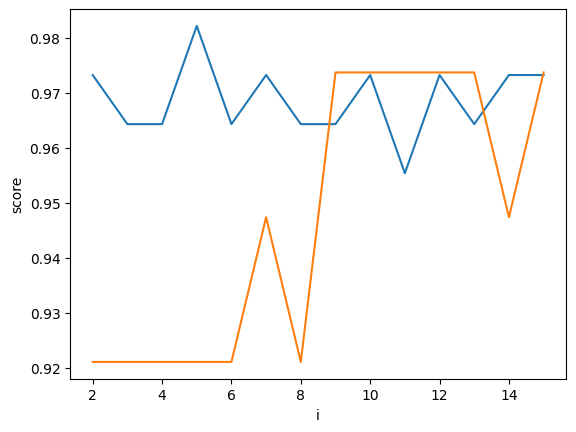

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x= np.arange(2,16,1)
plt.plot(x, score_train)
plt.plot(x, score_test)
plt.xlabel('i')
plt.ylabel('score')
plt.show()

In [16]:
print(score_train[5], score_test[5])
print(score_train[8], score_test[8])
print(score_train[10], score_test[10])
print(score_train[12], score_test[12])

0.9732142857142857 0.9473684210526315
0.9732142857142857 0.9736842105263158
0.9732142857142857 0.9736842105263158
0.9732142857142857 0.9473684210526315


In [17]:
kne = KNeighborsClassifier(n_neighbors = 7)
kne.fit(train_scaled, train_target)
print(kne.score(train_scaled, train_target))
print(kne.score(test_scaled, test_target))

0.9732142857142857
0.9473684210526315


##로지스틱 회귀를 이용해 다중분류 훈련 및 최적화하기


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.9821428571428571
0.9473684210526315


In [19]:
print(lr.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [20]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


In [21]:
print(lr.classes_)

['setosa' 'versicolor' 'virginica']


In [22]:
print(lr.coef_.shape, lr.intercept_.shape)

(3, 4) (3,)


In [23]:
decision = lr.decision_function(test_scaled[:5])

In [24]:
print(np.round(decision, decimals = 2))

[[ 14.49   7.22 -21.71]
 [ -2.88   2.82   0.06]
 [ -1.46   3.99  -2.52]
 [ -3.4    4.44  -1.04]
 [ 13.45   7.44 -20.9 ]]


In [25]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


In [26]:
from sklearn.linear_model import LogisticRegression
for j in range(1, 30):
  lr = LogisticRegression(C = j, max_iter = 1000)
  lr.fit(train_scaled, train_target)
  train_score = lr.score(train_scaled, train_target)
  test_score = lr.score(test_scaled, test_target)
  print(j, train_score, test_score)

1 0.9732142857142857 0.9210526315789473
2 0.9642857142857143 0.9473684210526315
3 0.9732142857142857 0.9473684210526315
4 0.9732142857142857 0.9473684210526315
5 0.9732142857142857 0.9473684210526315
6 0.9732142857142857 0.9473684210526315
7 0.9821428571428571 0.9473684210526315
8 0.9821428571428571 0.9473684210526315
9 0.9821428571428571 0.9473684210526315
10 0.9821428571428571 0.9473684210526315
11 0.9821428571428571 0.9473684210526315
12 0.9821428571428571 0.9473684210526315
13 0.9821428571428571 0.9473684210526315
14 0.9821428571428571 0.9473684210526315
15 0.9821428571428571 0.9473684210526315
16 0.9821428571428571 0.9473684210526315
17 0.9821428571428571 0.9473684210526315
18 0.9821428571428571 0.9473684210526315
19 0.9821428571428571 0.9473684210526315
20 0.9821428571428571 0.9473684210526315
21 0.9821428571428571 0.9473684210526315
22 0.9821428571428571 0.9473684210526315
23 0.9821428571428571 0.9473684210526315
24 0.9821428571428571 0.9473684210526315
25 0.9821428571428571 0.9

##확률적 경사 하강법을 이용해 다중 분류 훈련 및 최적화 하기

In [84]:
fish_input1 = fish[['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width']].to_numpy()

In [85]:
fish_target1 = fish['Species'].to_numpy()

In [86]:
train_input1, test_input1, train_target1, test_target1 = train_test_split(fish_input1, fish_target1, stratify=iris_target, random_state = 42)

In [87]:
ss1 = StandardScaler()
ss1.fit(train_input)
train_scaled1 = ss1.transform(train_input1)
test_scaled1 = ss1.transform(test_input1)

In [88]:
from sklearn.linear_model import SGDClassifier
sc1 = SGDClassifier(loss='log', max_iter = 10, random_state=42)
sc1.fit(train_scaled1, train_target1)
print(sc1.score(train_scaled1, train_target1))
print(sc1.score(test_scaled1, test_target1))

0.875
0.868421052631579


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [92]:
sc1 = SGDClassifier(loss='log', random_state=42)
train_score1 = []
test_score1 = []
classes = np.unique(train_target1)

In [93]:
for _ in range(0, 300):
  sc1.partial_fit(train_scaled1, train_target1, classes=classes)
  train_score1.append(sc1.score(train_scaled1, train_target1))
  test_score1.append(sc1.score(test_scaled1, test_target1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


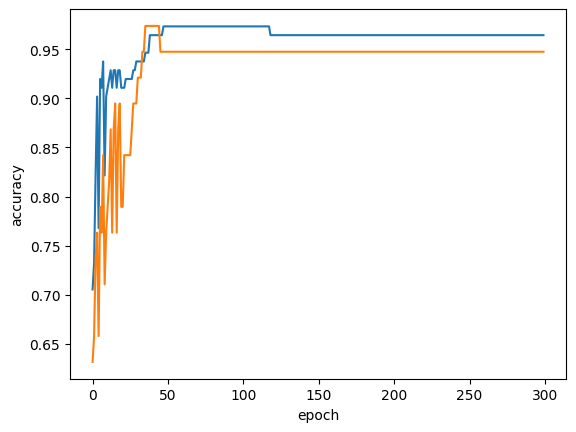

In [94]:
plt.plot(train_score1)
plt.plot(test_score1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [113]:
sc1 = SGDClassifier(loss='log', max_iter = 150, tol = None, random_state=42)
sc1.fit(train_scaled1, train_target1)
print(sc1.score(train_scaled1, train_target1))
print(sc1.score(test_scaled1, test_target1))

0.9642857142857143
0.9210526315789473


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
